# Tutorial de análisis exploratorio de datos con pandas y seaborn

En este notebook vamos a ver un ejemplo de analisis exploratorio de datos y visualización de datos, lo que intentaremos es intentar tener una comprensión mas profunda de nuestros datos y detectar patrones o anomalias.


En este notebook, realizaremos un análisis exploratorio de datos utilizando el dataset de Heart Failure Prediction - Clinical Records, Este conjunto de datos contiene los registros médicos de 5000 pacientes que tuvieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas.

### Estas son las columnas:

* **AGE**: edad del paciente (años)
* **Anaemia**: disminución de glóbulos rojos o hemoglobina (booleana)
* **Creatinine_phosphokinase**: nivel de la enzima CPK en la sangre (mcg/L)
* **Diabetes**: si el paciente tiene diabetes (booleano)
* **Ejection_fraction**: porcentaje de sangre que sale del corazón en cada contracción
* **High_blood_pressure**: si el paciente tiene hipertensión (booleano)
* **Platelets**: plaquetas en el sangre (kiloplaquetas/mL)
* **Serum_creatinine**: nivel de creatinina sérica en sangre (mg/dL)
* **Serum_sodium**: nivel de sodio sérico en sangre (mEq /L)
* **Sex**: mujer u hombre (binario)
* **Smoking**: si el paciente fuma o no (booleano)
* **Time**: período de seguimiento (días)
* **DEATH_EVENT**: si el paciente falleció durante el período de seguimiento (booleano)

### Las visualizaciones que haremos son:

* Histogramas y barras: Ayudan a identificar la forma de la distribución, como si es normal, sesgada, etc.

* Diagramas de Caja: Ayudan a detectar outliers y a comparar distribuciones entre categorías.

* Diagramas de Dispersión: Ayudan a identificar correlaciones lineales, no lineales o la ausencia de relaciones.

* heatmaps: para ver la correlacion de las variables.

### Cubriremos los siguientes pasos:


* 1.- Visualizacion inicial.

* 2.- Análisis descriptivo.

* 3.- Visualización univariable.

* 4.- Visualización bivariable.

* 5.- Limpieza de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primero de todo, vamos a cargar nuestros datos.

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv')

## 1.- visualización inicial

Este metodo nos muestra las 3 primeras filas y columnas de nuestro df.

In [3]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0


Vemos lo ultimos 3.

In [4]:
df.tail(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


Vamos a cambiar el nombre de nuestras columnas de ingles a español.

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.rename({
 'age':'edad',
 'anaemia':'anemia', 
 'creatinine_phosphokinase': 'cpk',
 'ejection_fraction':'fracción de eyección',  
 'high_blood_pressure': 'presión alterial alta', 
 'platelets': 'plaquetas',
 'serum_creatinine' : 'suero de creatinina', 
 'serum_sodium' : 'suero_sodio', 
 'sex' : 'sexo', 
 'smoking' : 'fumador',
 'time': 'tiempo',
 'DEATH_EVENT' : 'muerte'
}, axis=1, inplace=True)

## 2.- Análisis descriptivo

También podemos ver algunas estadisticas como la media, mediana, los cuartiles y algunos mas.

In [7]:
df.describe()

,edad,anemia,cpk,diabetes,fracción de eyección,presión alterial alta,plaquetas,suero de creatinina,suero_sodio,sexo,fumador,tiempo,muerte
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


Con el metodo info() podemos ver que tipo de datos es y si tienen valores nulos.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   5000 non-null   float64
 1   anemia                 5000 non-null   int64  
 2   cpk                    5000 non-null   int64  
 3   diabetes               5000 non-null   int64  
 4   fracción de eyección   5000 non-null   int64  
 5   presión alterial alta  5000 non-null   int64  
 6   plaquetas              5000 non-null   float64
 7   suero de creatinina    5000 non-null   float64
 8   suero_sodio            5000 non-null   int64  
 9   sexo                   5000 non-null   int64  
 10  fumador                5000 non-null   int64  
 11  tiempo                 5000 non-null   int64  
 12  muerte                 5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


Usando la funcion isnull() podemos ver si hay valores nulos, y si lo unimos con sum() nos da la suma de valores nulos de cada columna.

In [9]:
df.isnull().sum()

edad                     0
anemia                   0
cpk                      0
diabetes                 0
fracción de eyección     0
presión alterial alta    0
plaquetas                0
suero de creatinina      0
suero_sodio              0
sexo                     0
fumador                  0
tiempo                   0
muerte                   0
dtype: int64

Esto nos muestra el porcentaje de valores nulos de cada columna.

In [10]:
df.isnull().mean() * 100

edad                     0.0
anemia                   0.0
cpk                      0.0
diabetes                 0.0
fracción de eyección     0.0
presión alterial alta    0.0
plaquetas                0.0
suero de creatinina      0.0
suero_sodio              0.0
sexo                     0.0
fumador                  0.0
tiempo                   0.0
muerte                   0.0
dtype: float64

También es útil ver si hay algunos valores repetidos o infinitos.

In [11]:
df.isin([np.inf, -np.inf]).sum()

edad                     0
anemia                   0
cpk                      0
diabetes                 0
fracción de eyección     0
presión alterial alta    0
plaquetas                0
suero de creatinina      0
suero_sodio              0
sexo                     0
fumador                  0
tiempo                   0
muerte                   0
dtype: int64

Con esto cambiariamos los valores infinitos en nulos

In [12]:
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

Con esto vemos la correlación que tiene las columnas con la columna target.

In [13]:
df.corr()['muerte'].sort_values(ascending=False)

muerte                   1.000000
suero de creatinina      0.311281
edad                     0.249442
presión alterial alta    0.094023
cpk                      0.079706
sexo                     0.055604
anemia                   0.054508
fumador                  0.009397
diabetes                -0.011273
plaquetas               -0.031521
suero_sodio             -0.227355
fracción de eyección    -0.292702
tiempo                  -0.527234
Name: muerte, dtype: float64

### Preparar los datos para la visualizacion

In [14]:
df.dtypes

edad                     float64
anemia                     int64
cpk                        int64
diabetes                   int64
fracción de eyección       int64
presión alterial alta      int64
plaquetas                float64
suero de creatinina      float64
suero_sodio                int64
sexo                       int64
fumador                    int64
tiempo                     int64
muerte                     int64
dtype: object

lo primero seria diferenciar entre variables categoricas y numericas, ya que haremos visualizaciones diferentes para cada tipo de dato.
 
 Vamos a ver cuales son:

In [15]:
df.head(3)

,edad,anemia,cpk,diabetes,fracción de eyección,presión alterial alta,plaquetas,suero de creatinina,suero_sodio,sexo,fumador,tiempo,muerte
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0


En este caso todos son numericos, pero algunos como sexo, fumador o muerte son binarios (lo llamaremos categoricos),1 y 0, hombre o mujer, fumador o no.

In [16]:
df_num = ['edad', 'cpk', 'fracción de eyección', 'plaquetas', 'suero de creatinina', 'suero_sodio', 'tiempo']

df[df_num].head(3)

,edad,cpk,fracción de eyección,plaquetas,suero de creatinina,suero_sodio,tiempo
0,55.0,748,45,263358.03,1.3,137,88
1,65.0,56,25,305000.00,5.0,130,207
2,45.0,582,38,319000.00,0.9,140,244


In [17]:
df_num_binary = ['anemia', 'diabetes', 'presión alterial alta', 'sexo', 'fumador', 'muerte']

df[df_num_binary].head(3)

,anemia,diabetes,presión alterial alta,sexo,fumador,muerte
0,0,0,0,1,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0


## 3.- Visualización univariable

La primera visualización que haremos sera un histplot(historigrama) para las columnas numerica, nos servira para:


- Visualizar la distribución de una variable continua.

- Identificar patrones y la forma de la distribución (normal, sesgada, etc.).

- Detectar valores atípicos (outliers).

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

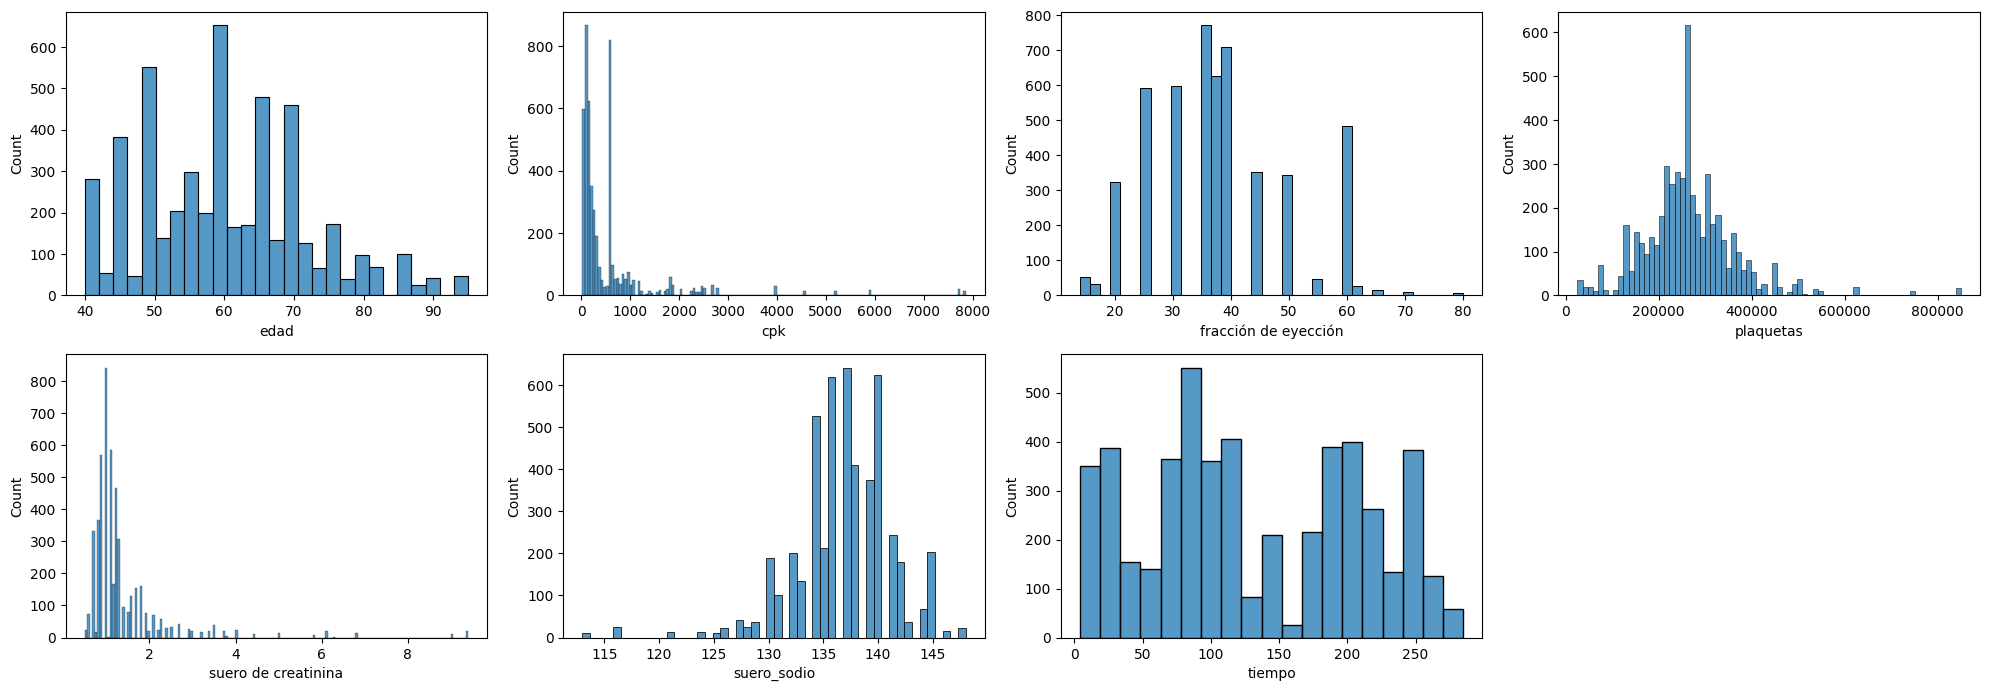

In [19]:
# Vamos a seleccionar las columnas numericas
plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(df_num, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna)
    
    plt.tight_layout()

Ahora para la siguiente un barplot, para las categoricas y nos sirve para:

- Visualizar comparaciones entre diferentes categorías.

- Comparar frecuencias o promedios de diferentes grupos.

- Identificar patrones y diferencias entre categorías.

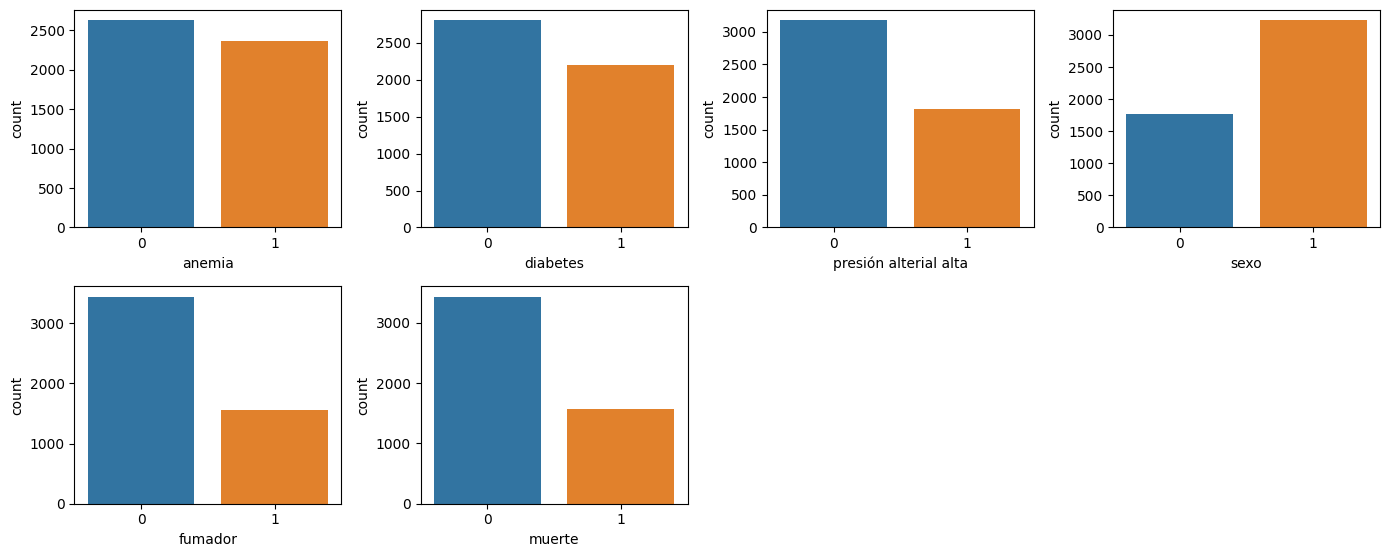

In [20]:
# Vamos a seleccionar las columnas numericas
plt.figure(figsize=(14, 8), dpi=100)

for i, columna in enumerate(df_num_binary, start=1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=columna)
    
    plt.tight_layout()


También es útil utilizar boxplots, para ver los valores atípicos en variables numericas.

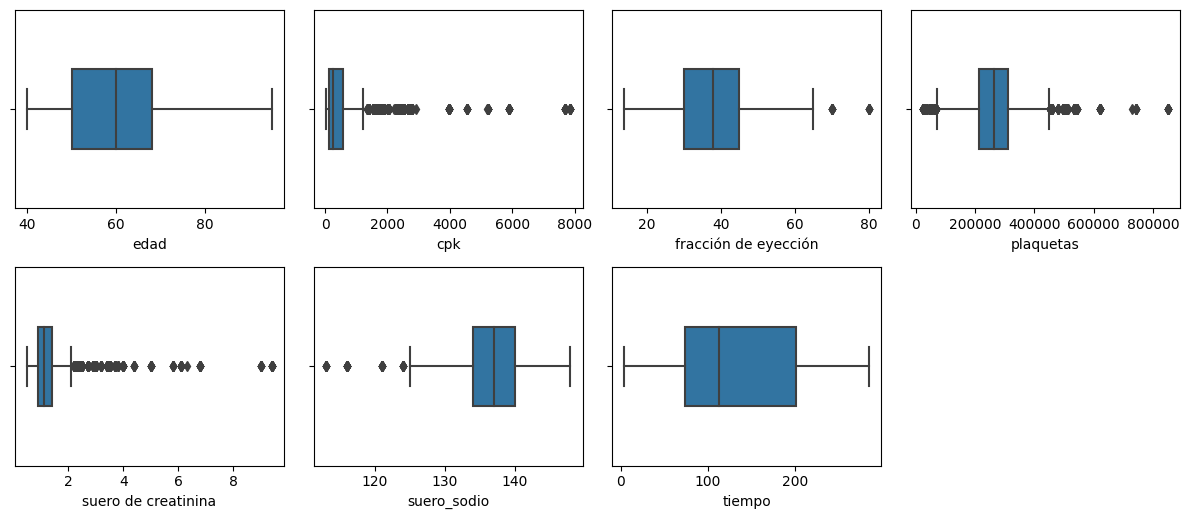

In [21]:
# Elegimos los mismos valores numericos
plt.figure(figsize=(12, 10), dpi=100)

for i, columna in enumerate(df_num, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=columna, width=0.4)
    
    plt.tight_layout()


## 4.- visualizaciones bivariables

Ahora haremos también un histplot pero añadiendo la categoria muertepara 

- saber como se diferencia las distribuciones de estas dos categorias (muerto o no).

<function matplotlib.pyplot.show(close=None, block=None)>

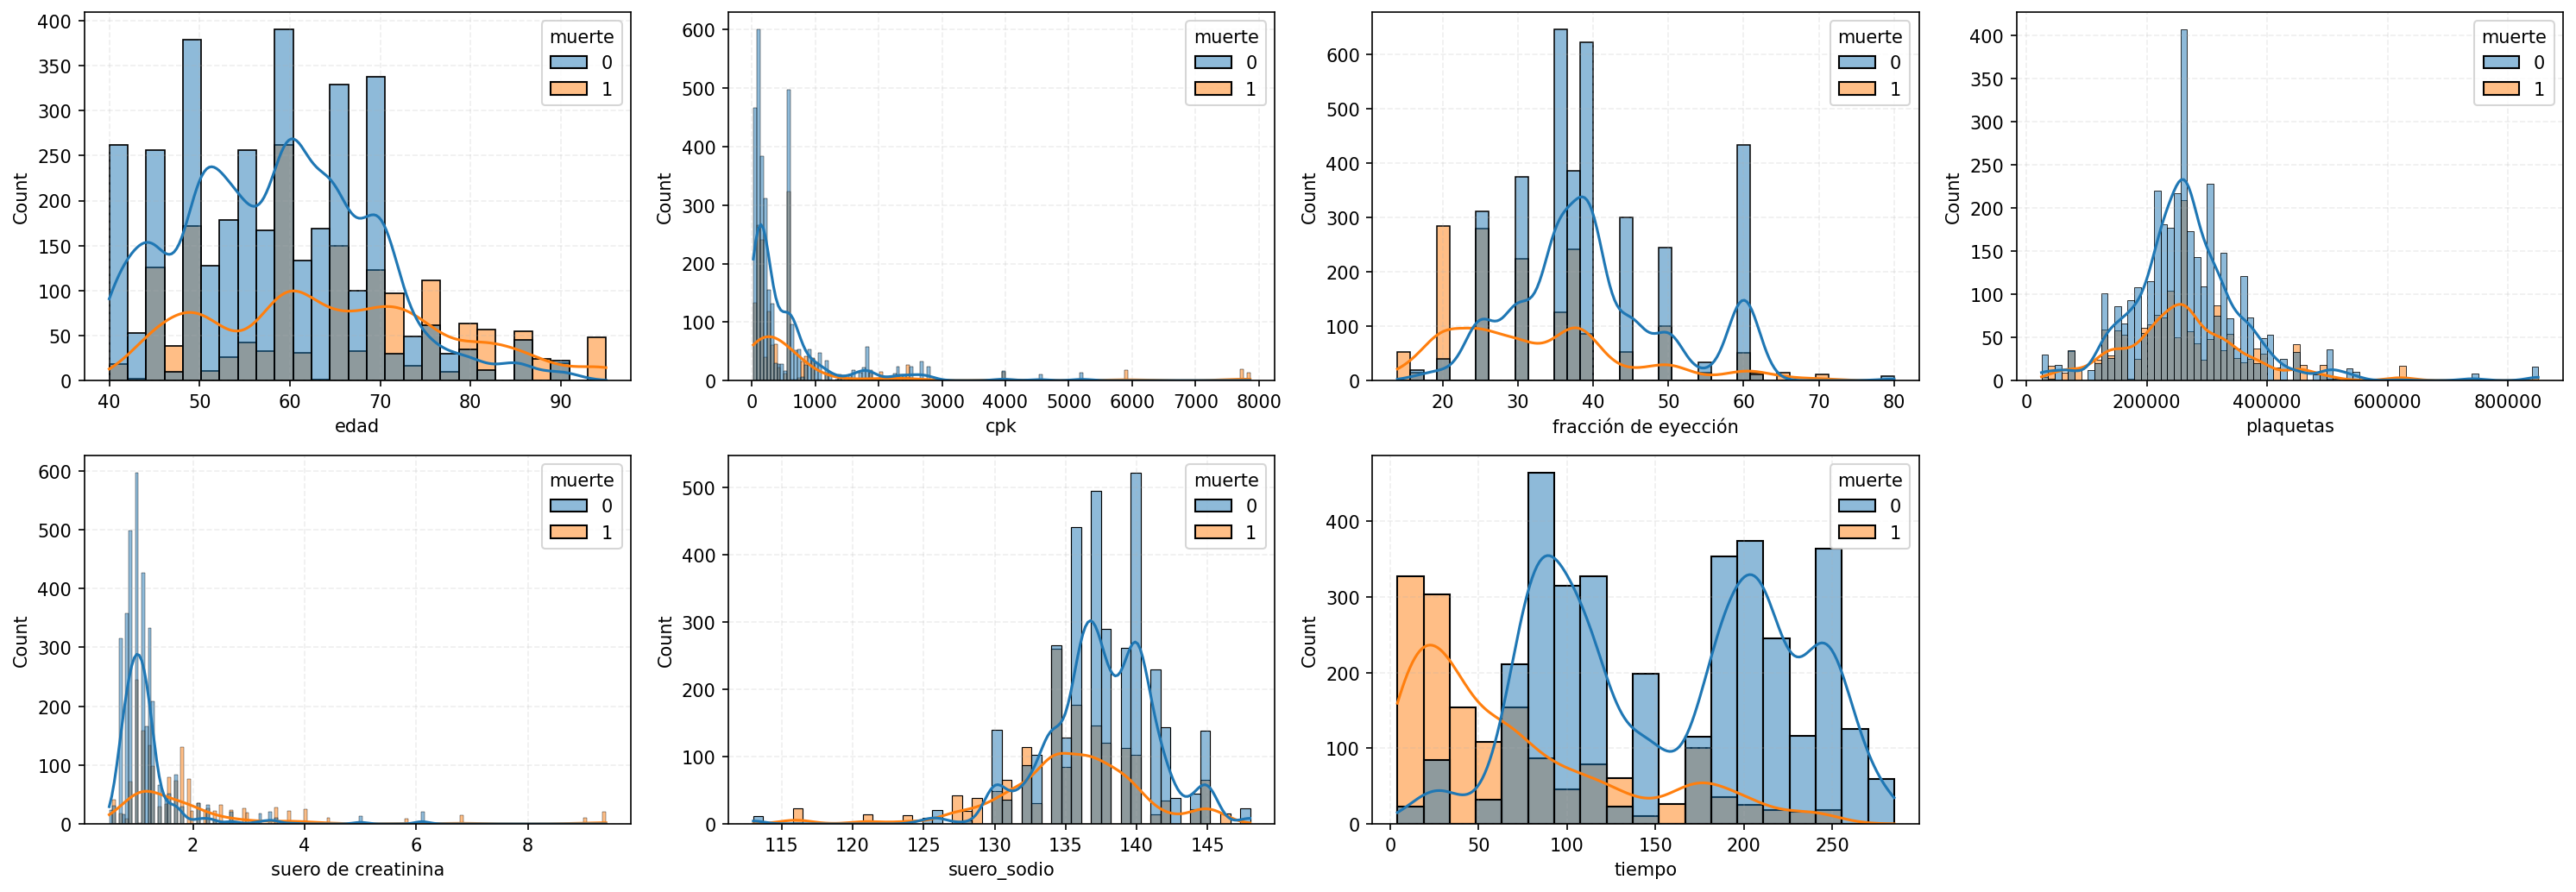

In [22]:
plt.figure(figsize=(20, 10), dpi=150)

for i, columna in enumerate (df_num, start=1):
    plt.subplot(3, 4, i)
    #Aqui colocamos hue='muerte', para diferenciar por colores las dos categorias
    sns.histplot(data=df, x=columna, hue='muerte', kde=True)
    
    plt.grid(True, linestyle='--', alpha=0.2)
    
    plt.tight_layout()
    
plt.show

Tambien una visualización bivariable muy utilizada es la de scatterplot que se utiliza para

- Comprobar si existe una relacion lineal o no entre dos variables,en este caso comparando todas las columna entre si.

- Añadimos hue='muerte', para ver la distribución de estas dos categorias.

Para hacerlo mas sencillo usaremos sns.pairplot.

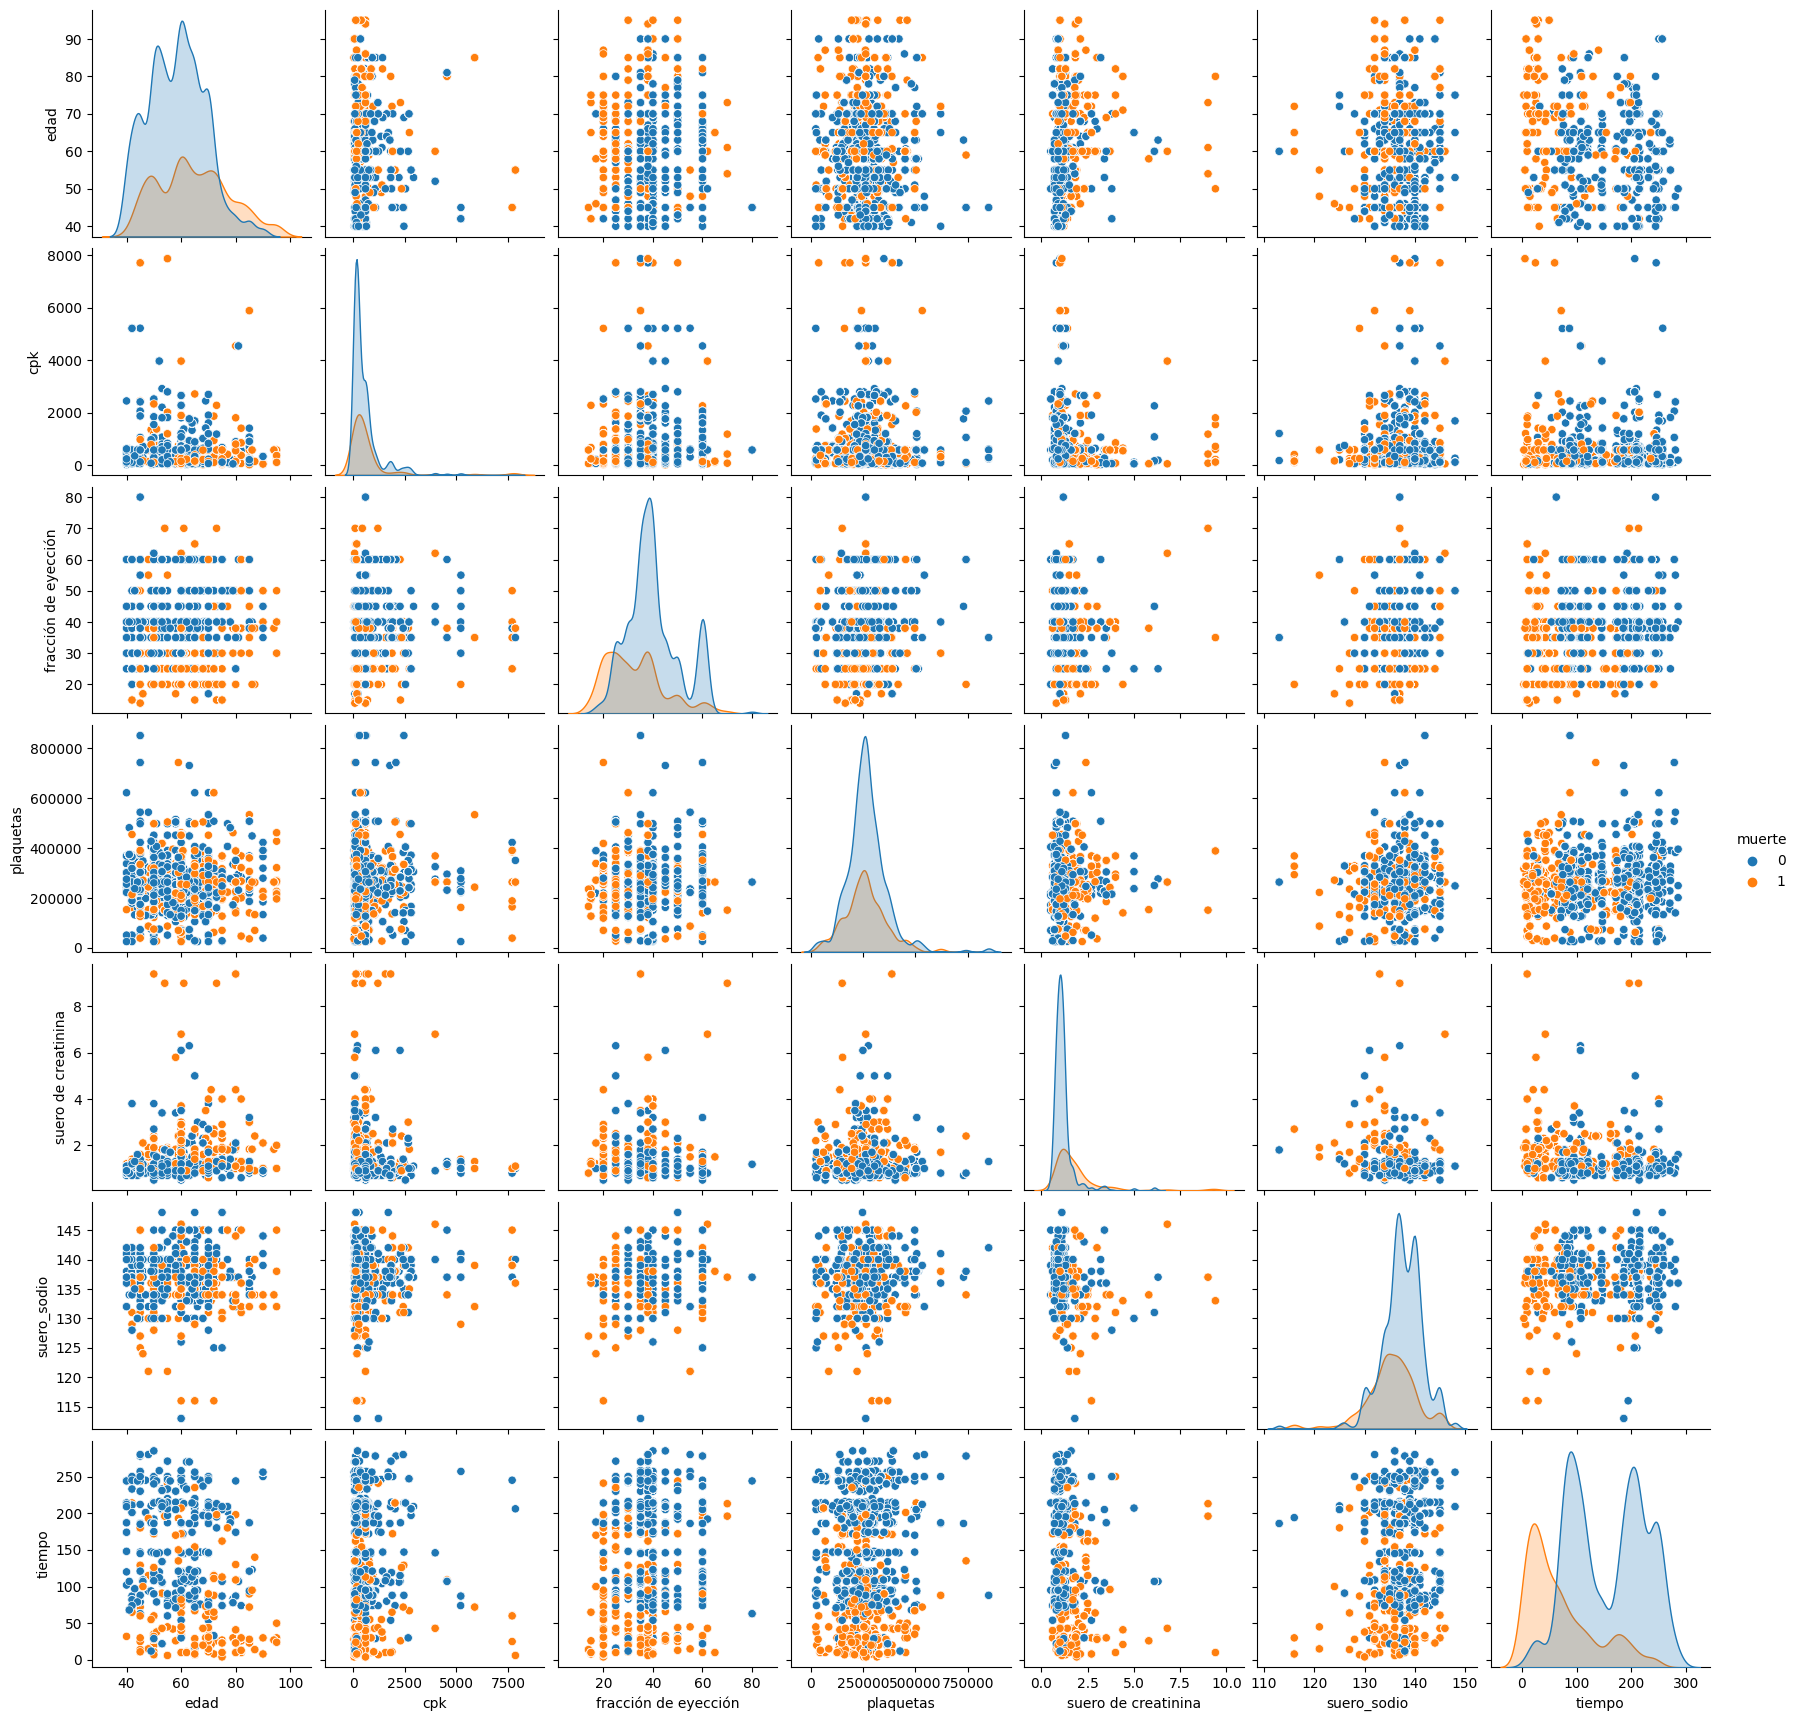

In [23]:
#Aqui simplemente añadimos muerte a la division de numericos y categoricos que habiamos hecho 
pairplot_df = df[['edad', 'cpk', 'fracción de eyección', 'plaquetas', 'suero de creatinina', 'suero_sodio', 'tiempo', 'muerte']]

sns.pairplot(data=pairplot_df, hue='muerte')

Otra visualización bivariable muy utilizada es el boxplot, que se utiliza para:

- Comparar la distribución de una variable numérica entre diferentes categorías de una variable categórica. En este caso, comparando todas las columnas numéricas frente a la variable categórica 'muerte'.

Añadimos x='muerte' y y=columna para ver la distribución de estas dos categorías.

Para hacerlo más sencillo, usamos sns.boxplot.

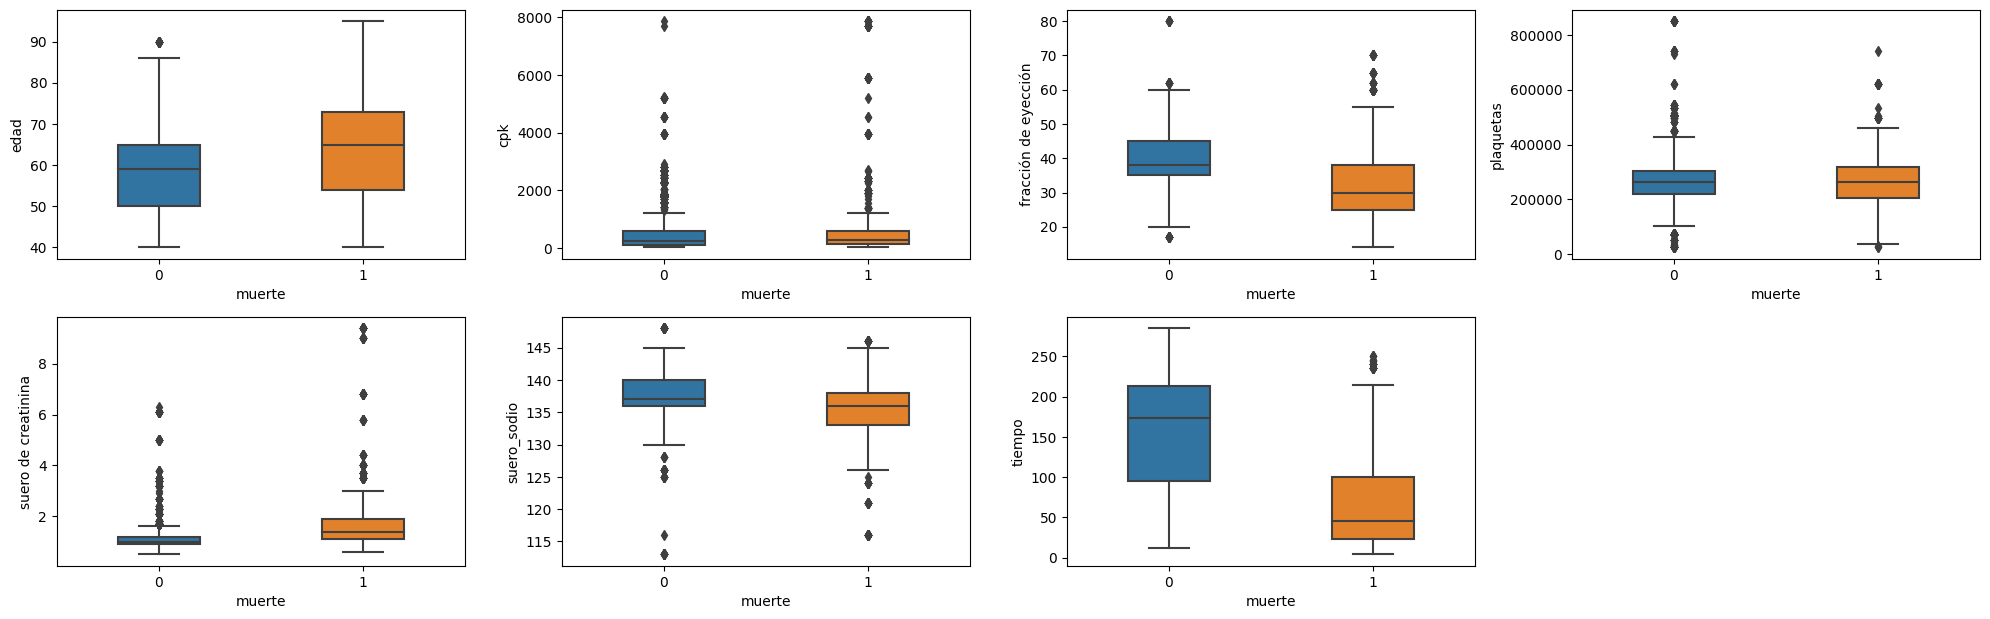

In [24]:
# Elegimos los mismos valores numericos
box_df = ['edad', 'cpk', 'fracción de eyección', 'plaquetas', 'suero de creatinina', 'suero_sodio', 'tiempo']

plt.figure(figsize=(20, 12), dpi=100)

for i, columna in enumerate(box_df, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='muerte', y=columna, width=0.4)
    
    plt.tight_layout()

Otra visualización bivariable muy utilizada es el heatmap, que se utiliza para:

- Visualizar la matriz de correlación entre diferentes variables numéricas. Permite identificar rápidamente relaciones lineales fuertes o débiles entre pares de variables.

Añadimos annot=True para mostrar los valores de correlación en el mapa de calor.

Para hacerlo usamos sns.heatmap.

<Axes: >

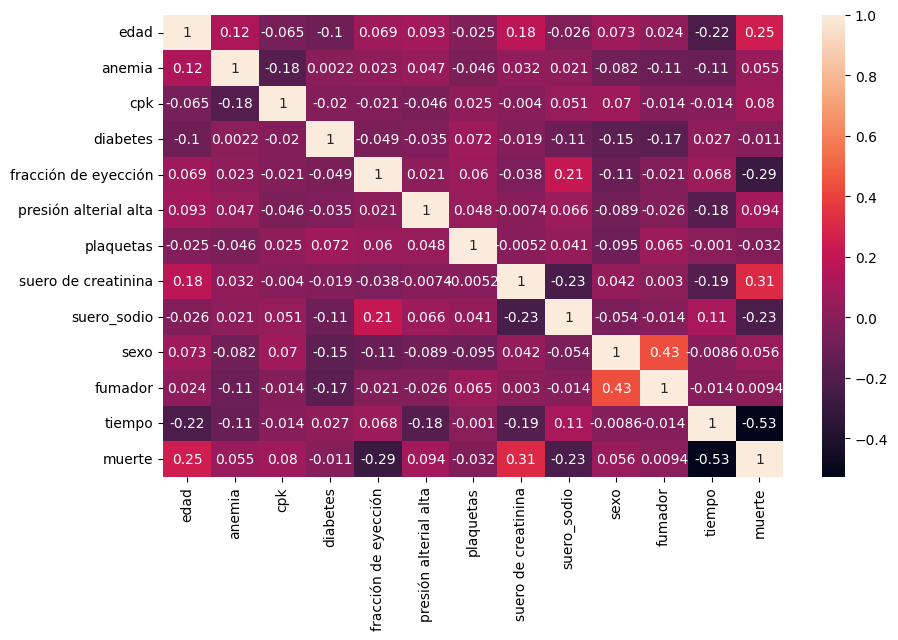

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

 ### Conclusiones
 - Parece que tenemos algunos valores extremos que tenemos que eliminar
 - Hay algunos valores que estan un poco correlacionados pero no demasiado
 - no tenemos valores nulos ni infinitos

#### Hasta aquí el ejemplo de código.

En mi perfil encontrarás más ejemplos sobre temas relacionados, como el preprocesamiento de datos, que sigue al análisis. Ahí podrás descubrir cómo abordar situaciones como la que hemos visto, manejando valores extremos, o cómo tratar casos de valores nulos, entre otros aspectos muy importantes. 